#**LEVEL 1**

In [1]:
! pip install langchain langgraph openai langchain_community

In [30]:
from langchain_core.messages import HumanMessage, AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key="YOUR API_KEY")

def chatbot_node(state):
    message = state['messages'][-1].content

    if any(op in message for op in "+-*/()"):
        response = calculator_tool(message)
    else:
        response = llm.invoke([HumanMessage(content=message)]).content

    return {"messages": state['messages'] + [AIMessage(content=response)]}


In [31]:
pip install -q langgraph graphviz

Note: you may need to restart the kernel to use updated packages.


In [27]:
import re

class WeatherMind:
    def __init__(self, name="chatbot"):
        self.name = name

    def calculator_tool(self, user_input):
        try:
            expression = re.findall(r"[\d\.\+\-\*/\(\) ]+", user_input)
            if not expression:
                return "Sorry, I couldn't find a valid math expression."

            expr = ''.join(expression)
            result = eval(expr, {"__builtins__": None}, {})
            return f"The result is: {result}"
        except Exception as e:
            return f"Error: {str(e)}"

    def chat(self):
        print(f"{self.name}: Hi! I’m your calculator. Type 'exit' to quit.")
        while True:
            user_input = input("You: ")
            if user_input.lower() in ['exit', 'quit']:
                print(f"{self.name}: Goodbye!")
                break
            response = self.parse_and_calculate(user_input)
            print(f"{self.name}: {response}")
WeatherMind = WeatherMind()
WeatherMind.chat()

chatbot: Hi! I’m your calculator. Type 'exit' to quit.


You:  quit


chatbot: Goodbye!


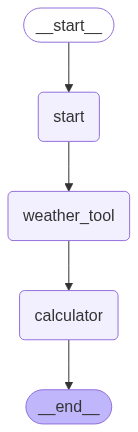

In [6]:
from IPython.display import display, Image
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import StateGraph, END

graph = StateGraph(dict)

graph.add_node("start", action=lambda x: x) 
graph.add_node("weather_tool", action=lambda x: print("Calling weather tool")) 
graph.add_node("calculator", action=lambda x: print("Calling calculator")) 

graph.set_entry_point("start")
graph.add_edge("start", "weather_tool")
graph.add_edge("weather_tool", "calculator")
graph.set_finish_point("calculator")

graph.set_finish_point("calculator")

compiled_graph = graph.compile()

display(Image(compiled_graph.get_graph().draw_mermaid_png()))

#**LEVEL 2**

In [9]:
import re
def extract_location(query):
    match = re.search(r"in ([A-Z][a-zA-Z\s]+)", query)
    return match.group(1) if match else None
def get_fashion_trends(city):
    fake_trends = {
        "Tokyo": ["Wide-leg trousers", "Techwear jackets", "Pastel layers"],
        "Paris": ["Chic trench coats", "Monochrome tones", "Retro sneakers"],
        "New York": ["Denim on denim", "Utility vests", "Chunky boots"],
    }
    return fake_trends.get(city, ["No trend data found. Try another location."])
class FashionRecommender:
    def respond(self, query):
        city = extract_location(query)
        if not city:
            return "Please specify a location like 'What's trending in Tokyo?'"
        
        trends = get_fashion_trends(city)
        if "No trend data" in trends[0]:
            return trends[0]
        
        response = f"Currently trending in {city}:\n- " + "\n- ".join(trends)
        return response
fashion_bot = FashionRecommender()
user_input = "What's trending in Tokyo?"
print(fashion_bot.respond(user_input))

Currently trending in Tokyo:
- Wide-leg trousers
- Techwear jackets
- Pastel layers


In [13]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

In [14]:
from typing import Annotated
from typing_extensions import TypedDict

In [15]:
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

In [16]:
!pip install arxiv wikipedia

In [22]:
api_wrapper=WikipediaAPIWrapper (top_k_results=1,doc_content_char_max=500)
wiki_tool = WikipediaQueryRun(api_wrapper = api_wrapper)

In [25]:
wiki_tool.invoke("About weather of India")


"Page: Climate of India\nSummary: The climate of India consists of a wide range of weather conditions across a vast geographic scale and varied topography. Based on the Köppen system, India encompasses a diverse array of climatic subtypes. These range from arid and semi-arid regions in the west to highland, sub-arctic, tundra, and ice cap climates in the northern Himalayan regions, varying with elevation. \nThe northern lowlands experience subtropical conditions which become more temperate at higher altitudes, like the Sivalik Hills, or continental in some areas like Gulmarg. In contrast, much of the south and the east exhibit tropical climate conditions, which support lush rainforests in parts of these territories. Many regions have starkly different microclimates, making it one of the most climatically diverse countries in the world. The country's meteorological department follows four seasons with some local adjustments: winter (December to February), summer (March to May), monsoon 

#**LEVEL 4**

In [35]:
!pip install langgraph-supervisor langchain-openai

In [36]:
from langchain.tools import Tool
from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent

In [41]:
!!capture --no-stderr
!pip install langchain-opentutorial

In [42]:
from langchain_opentutorial import package

package.install(
    [
        "python-dotenv",
        "langchain_core",
        "langchain_community",
        "langchain_openai",
        "langchain_experimental",
        "langgraph",
        "matplotlib",
    ],
    verbose=False,
    upgrade=False,
)

In [43]:
from langchain_opentutorial import set_env

set_env(
    {
        "OPENAI_API_KEY": "",
        "LANGCHAIN_API_KEY": "",
        "TAVILY_API_KEY": "",
        "LANGCHAIN_TRACING_V2": "true",
        "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
        "LANGCHAIN_PROJECT": "Multi-Agent-Supervisor",
    }
)

Environment variables have been set successfully.


In [48]:
from dotenv import load_dotenv

load_dotenv(override=True)

False

In [49]:
from langgraph.graph import StateGraph
from typing_extensions import TypedDict, Annotated
from langchain_core.messages import BaseMessage
import operator

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # merge messages
    next: str


In [52]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_experimental.tools import PythonREPLTool

api_wrapper=WikipediaAPIWrapper (top_k_results=1,doc_content_chars_max=300)
wiki_tool = WikipediaQueryRun(api_wrapper = api_wrapper)


In [54]:
pip install tavily-python


Note: you may need to restart the kernel to use updated packages.


In [71]:
from langchain_community.tools.tavily_search import TavilySearchResults
import os
os.environ["TAVILY_API_KEY"] = "YOUR_API_KEY"

tavily_tool = TavilySearchResults(max_results=3)


In [72]:
from langchain_core.messages import HumanMessage
def agent_node(state, agent, name):
    agent_response = agent.invoke(state)
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }

In [73]:
from typing import Literal

from pydantic import BaseModel
members = ["Researcher", "Coder"]
options_for_next = ["FINISH"] + members
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]

In [74]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
system_prompt = (
    "You are a supervisor tasked with managing a conversation between the"
    " following workers:  {members}. Given the following user request,"
    " respond with the worker to act next. Each worker will perform a"
    " task and respond with their results and status. When finished,"
    " respond with FINISH."
)
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def supervisor_agent(state):
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    return supervisor_chain.invoke(state)

In [70]:
response = supervisor_agent(state)
print("Supervisor says next agent should be:", response.next)
fashion_bot = FashionRecommender()
user_input = "What's trending in Tokyo?"
print(fashion_bot.respond(user_input))

APIConnectionError: Connection error.